# PyVIMS

This notebook provide and a set of example of how to manipulate the Cassini VIMS data using the python [`pyvims`](https://pypi.org/project/pyvims/) module.

In [1]:
import os

import wget

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

from pyvims import VIMS

## Get some data

To start this example your need to download some data. Here we will start with a cube ([`1487096932_1`](https://vims.univ-nantes.fr/cube/1487096932_1)) calibrated with [USGS-ISIS3](https://isis.astrogeology.usgs.gov/fixit/projects/isis/wiki/Working_with_Cassini_VIMS) sofware and available on the [vims.univ-nantes.fr](https://vims.univ-nantes.fr) data portal:

In [2]:
vims_website = 'https://vims.univ-nantes.fr'

image_id = '1487096932_1'

for channel in ['vis', 'ir']:
    for cube_type in ['C', 'N']:
        fname = cube_type + image_id + '_' + channel + '.cub'

        if not os.path.isfile('data/' + fname):
            print('Downloading {}'.format(fname))
            wget.download(vims_website + '/cube/' + fname, out='data/' + fname)

## Loading a cube file

The location of the files can be specify with the `root` attribute.

In [3]:
cube = VIMS('1487096932_1', root='data/')
cube

VIMS cube: 1487096932_1 [ISIS3]

## Extract some metadata

The `VIMS` object provide a direct access to a subset of the cube metedata (extracted from the file header with the [`pvl`](https://github.com/planetarypy/pvl) module).

Here is a list of the metadata available about the capture time:

In [4]:
# Acquisition start time (as `datetime` object)
print('Start:', cube.start)

# Acquisition stop time (as `datetime` object)
print('Stop:', cube.stop)

# Acquisition mid-time (as `datetime` object or `%Y-%m-%dT%H:%M:%S.%f` format)
print('Mid-Time:', cube.dtime, 'or', cube.time)

# Image year
print('Year:', cube.year)

# Image day of the year
print('DOY:', cube.doy)

# Image decimal year
print('Decimal year:', cube.year_d)

# Image date (as `YYYY/MM/DD` format)
print('Date:', cube.date)

Start: 2005-02-14 18:02:29.023000
Stop: 2005-02-14 18:07:32.930000
Mid-Time: 2005-02-14 18:05:00.976500 or 2005-02-14T18:05:00.976500
Year: 2005
DOY: 45
Decimal year: 2005.1205479452055
Date: 2005/02/14


## Extract data

Extract the spatial information for a specific band or wavelength:

In [5]:
cube.getImg(band=167)

array([[-5.4426567e-04, -1.3694621e-04, -9.3489932e-04, ...,
         6.3502282e-02,  5.7736006e-02,  5.2320253e-02],
       [-5.4470141e-04, -1.4113497e-04, -1.4001154e-04, ...,
         6.7836367e-02,  6.3464731e-02,  5.8084715e-02],
       [ 2.5238303e-04,  2.5037612e-04, -1.4415705e-04, ...,
         7.2807170e-02,  6.7784242e-02,  6.4127207e-02],
       ...,
       [ 4.5216573e-05, -6.5096840e-04,  4.4637396e-05, ...,
        -2.7215341e-04,  3.5355415e-04,  4.0521652e-05],
       [ 4.0477469e-05,  4.0214873e-05, -3.0602355e-04, ...,
         3.4900461e-04,  3.6208461e-05, -2.7794950e-04],
       [-3.1504055e-04, -3.1299971e-04,  3.5281686e-05, ...,
         3.1918044e-05,  3.1983360e-05,  3.2059252e-05]], dtype=float32)

In [6]:
cube.getImg(wvln=2.03)

array([[-5.4426567e-04, -1.3694621e-04, -9.3489932e-04, ...,
         6.3502282e-02,  5.7736006e-02,  5.2320253e-02],
       [-5.4470141e-04, -1.4113497e-04, -1.4001154e-04, ...,
         6.7836367e-02,  6.3464731e-02,  5.8084715e-02],
       [ 2.5238303e-04,  2.5037612e-04, -1.4415705e-04, ...,
         7.2807170e-02,  6.7784242e-02,  6.4127207e-02],
       ...,
       [ 4.5216573e-05, -6.5096840e-04,  4.4637396e-05, ...,
        -2.7215341e-04,  3.5355415e-04,  4.0521652e-05],
       [ 4.0477469e-05,  4.0214873e-05, -3.0602355e-04, ...,
         3.4900461e-04,  3.6208461e-05, -2.7794950e-04],
       [-3.1504055e-04, -3.1299971e-04,  3.5281686e-05, ...,
         3.1918044e-05,  3.1983360e-05,  3.2059252e-05]], dtype=float32)

__Note:__ If the wavelength is provided, the closest corresponding band is selected (no interpolation between the bands).

To extract the 10 first wavelengths and the spectrum I/F at a specific location (sample/line):

In [7]:
spec = cube.getSpec(S=20, L=15)

cube.wvlns[:10], spec[:10]

(array([0.35054, 0.35895, 0.36629, 0.37322, 0.37949, 0.3879 , 0.39518,
        0.40252, 0.40955, 0.41731]),
 array([0.05770097, 0.06194281, 0.06165274, 0.07216963, 0.06976949,
        0.06189591, 0.05809197, 0.07248283, 0.06709387, 0.06832074],
       dtype=float32))

To get the geographic coordinates:

In [8]:
cube.getLon(S=20, L=15), cube.getLat(S=20, L=15)

(212.79308, -29.281103)

To get the illumination values:

In [9]:
cube.getInc(S=20, L=15), cube.getEme(S=20, L=15), cube.getPhase(S=20, L=15)

(7.461604, 26.32574, 20.066418)

## Plot data

Plot image for a specific wavelength (ie auto-select the closest band):

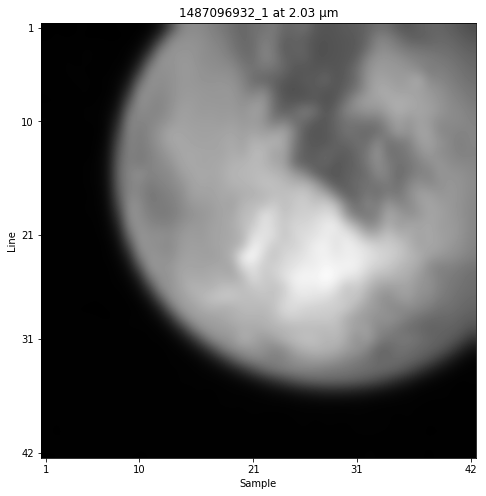

In [10]:
cube.plot_wvln(2.03)

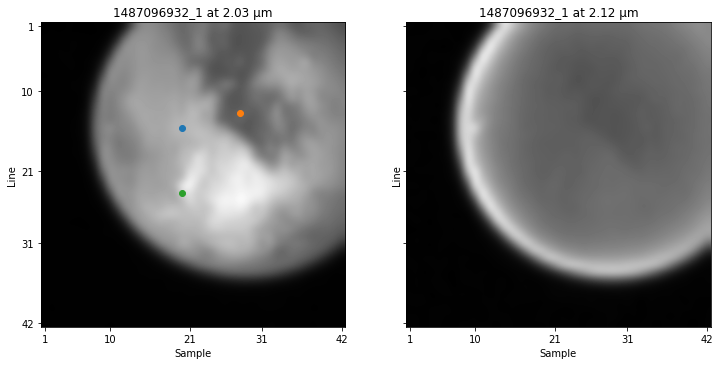

In [11]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 6))

cube.plot_wvln(2.03, ax=axes[0])
cube.plot_wvln(2.12, ax=axes[1])

axes[0].plot(20, 15, 'o')
axes[0].plot(28, 13, 'o')
axes[0].plot(20, 24, 'o');

Plot spectrum for a specific pixel (blue dot in the previous image):

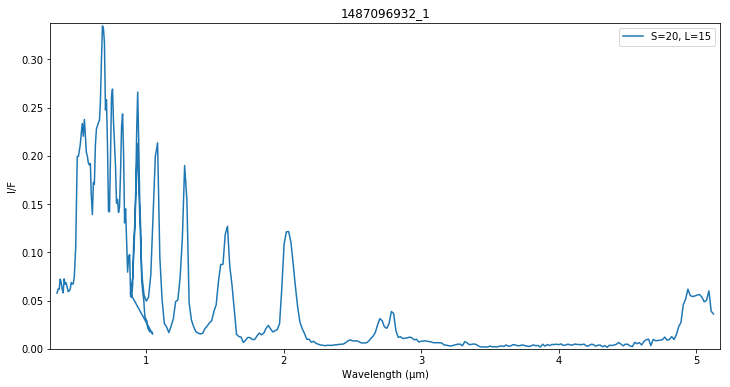

In [12]:
cube.plot_spectrum(S=20, L=15)

Display multiple IR spectrum on the same plot:

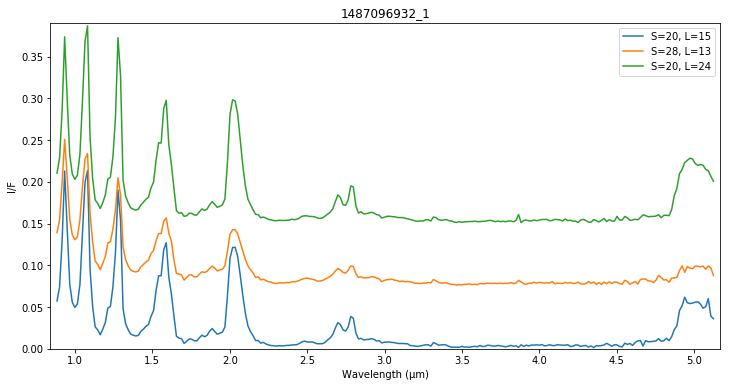

In [13]:
cube.plot_spectrum(S=[20, 28, 20], L=[15, 13, 24], yoffset=[0, .075, 0.15], vis=False)

## Mapping

Project the data on a map (longitude-latitude projection ``lonlat``). The yellow dot corresponds to the sub-solar location, the yellow line represents the illumination great circle. The blue dot corresponds to the sub-spacecraft location, the blue line represents Cassini field of view. The cube data are interpolated within the image contour. The default wavelength used is 2.03 µm but can be changed with ``wvln`` attribute.

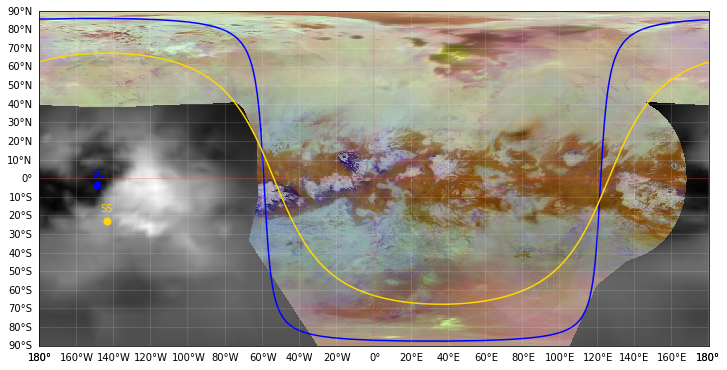

In [14]:
cube.plot_map();

Change the projection system to ``mollweide``:

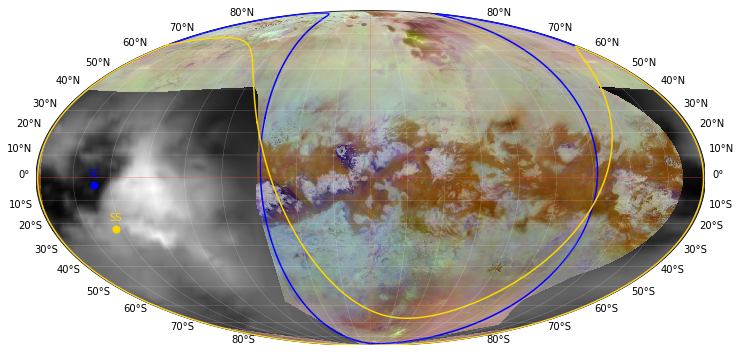

In [15]:
cube.plot_map('mollweide');

Change the projection system to ``polar`` for a polar azimuthal equidistant projection. The selected pole is based on the latitude of sub-spacecraft point.

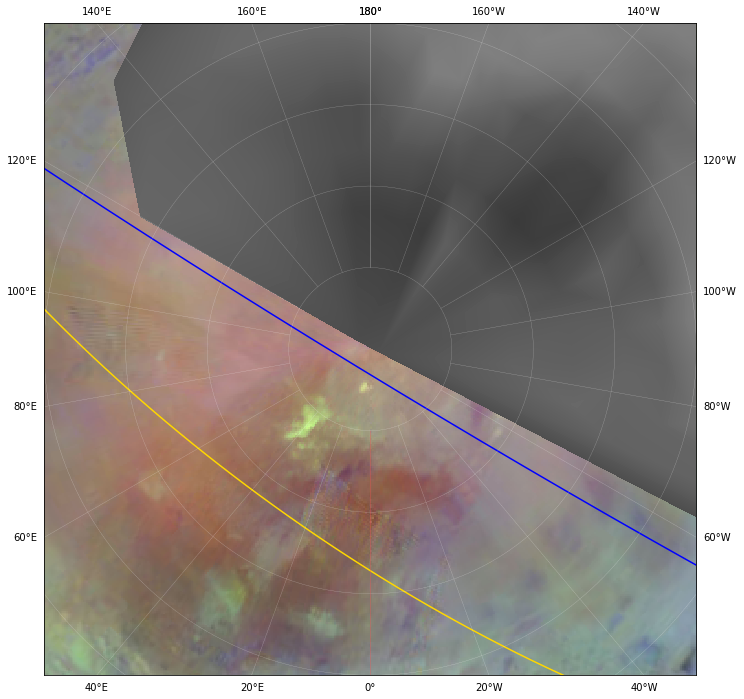

In [16]:
cube.plot_map('polar');

Change the projection system to ``ortho`` to get Cassini point of view:

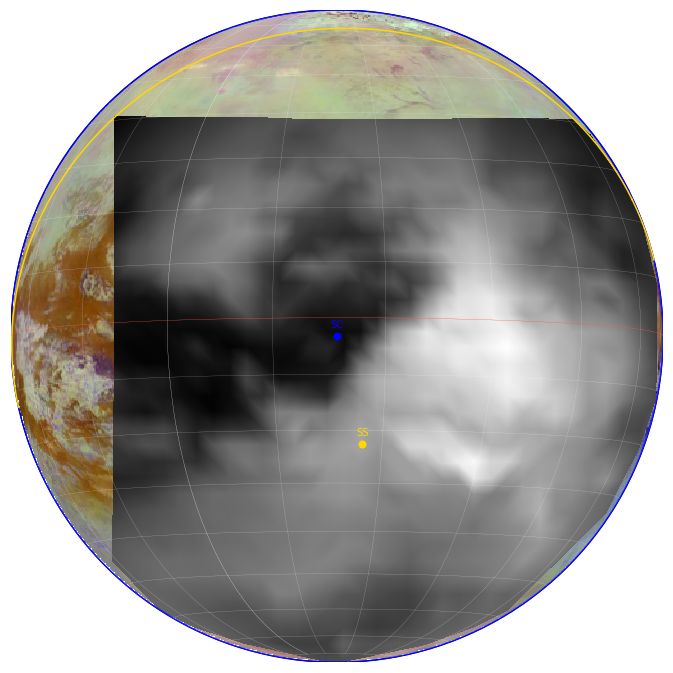

In [17]:
cube.plot_map('ortho');

Show only the image footprint over the ISS mosaic background. Disable SC/SS points and great circles:

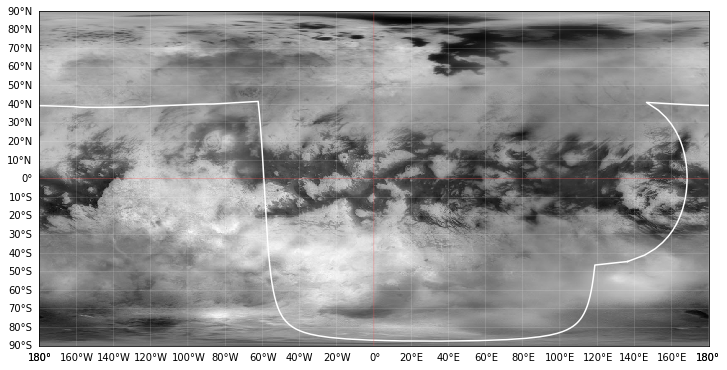

In [18]:
cube.plot_map('lonlat', show_cube=False, show_footprint=True, show_pts=False, show_gc=False, bg='Titan_ISS');

Show VIMS cube and ISS mosaic side by side:

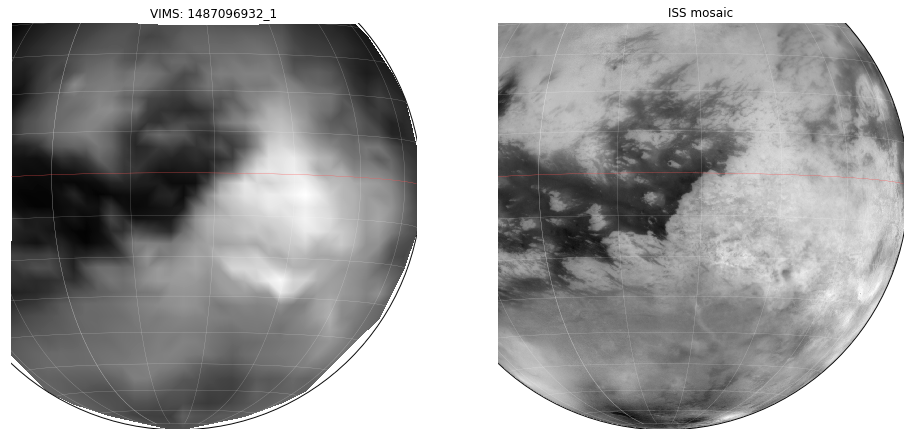

In [19]:
fig = plt.figure(figsize=(16, 8))

plt.subplot(121)
cube.plot_map('ortho', show_pts=False, show_gc=False, limit=True, bg=None, fig=fig)
plt.title('VIMS: {}'.format(cube.imgID))

plt.subplot(122)
cube.plot_map('ortho', show_pts=False, show_gc=False, limit=True, bg='Titan_ISS-HR', show_cube=False, fig=fig)
plt.title('ISS mosaic');